### 主成分分析(PCA)
- データセットの特徴量を相互に統計的に関連しないように回転する手法
- 多くの場合、回転した後の特徴量から、データを説明するのに重要な一部の特徴量だけを抜き出す

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

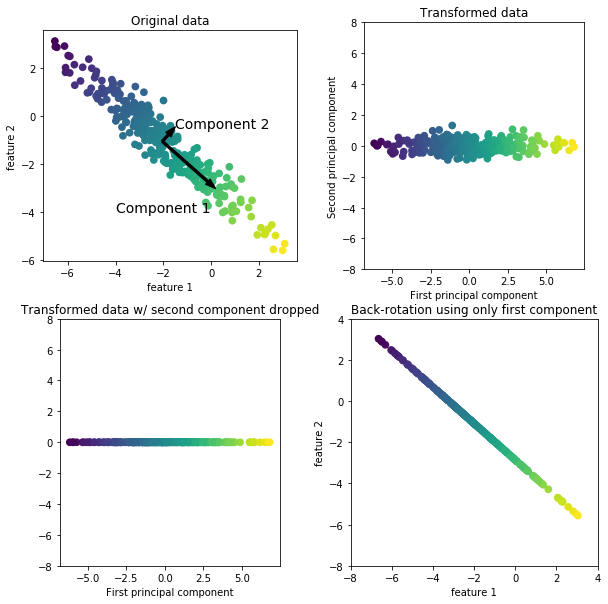

In [2]:
mglearn.plots.plot_pca_illustration()

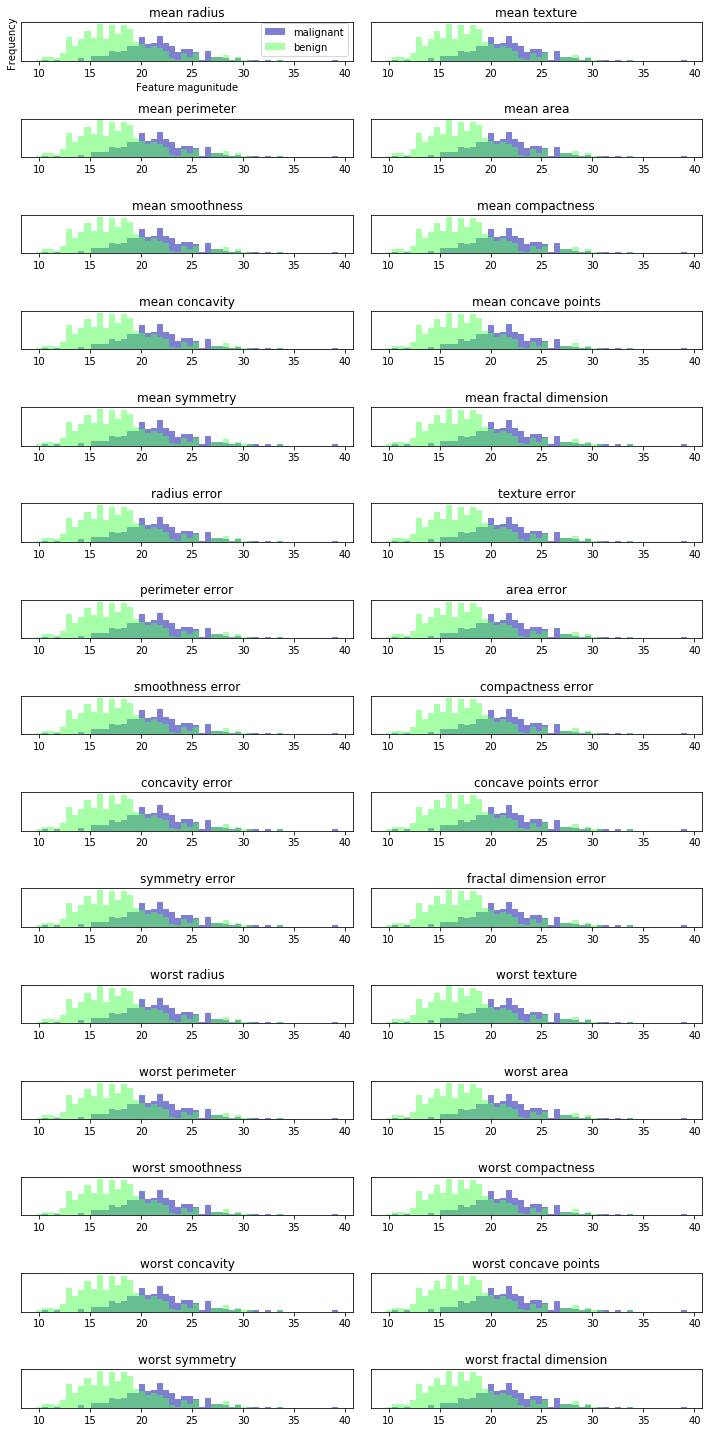

In [3]:
# cancerデータセットのPCAによる可視化
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, 1], bins=50)
    ax[i].hist(malignant[:, 1], bins=bins, color=mglearn.cm3(0), alpha=0.5)
    ax[i].hist(benign[:, 1], bins=bins, color=mglearn.cm3(2), alpha=0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magunitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [5]:
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [6]:
from sklearn.decomposition import PCA
# データの最初の2つの主成分だけ維持する
pca = PCA(n_components=2)
# cancerデータセットにPCAモデルを適合
pca.fit(X_scaled)
X_pca = pca.transform(cancer.data)

# 最初の2つの主成分に対してデータポイントを変換
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


Text(0,0.5,'Second principal component')

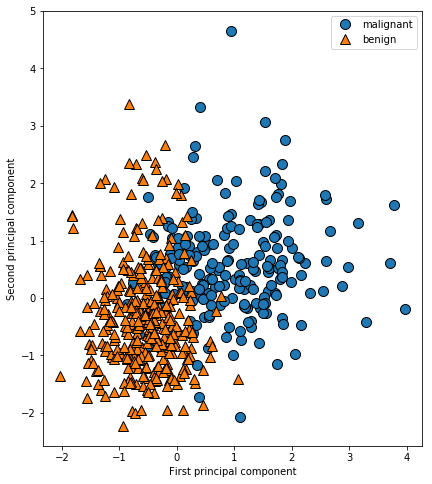

In [7]:
# 第一主成分と第二主成分によるプロット
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_scaled[:, 0], X_scaled[:, 1], cancer.target)
plt.legend(cancer.target_names, loc='best')
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [8]:
pca.components_.shape

(2, 30)

In [9]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

Text(0,0.5,'Principal components')

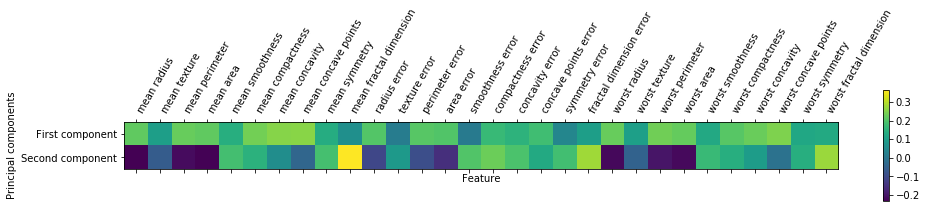

In [10]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")